# CS4 - Deep Learning and Applications Lab
# Friday Novemnber 13, 2020 

# Tutorial 7: Stock Market Prediction using Sequence Model

Schematically, a RNN layer uses a for loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far.

Here is a simple example of a Sequential model that processes sequences of float data, embeds each float data into a (60,1)-dimensional vector, then processes the sequence of vectors using LSTM/GRU layers.

**1. Data Reading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
df = DataReader('BEL.NS', data_source='yahoo', start='2002-01-01', end=datetime.now())
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-07-01,6.512120,6.216670,6.263640,6.448480,22035948.0,0.000311
2002-07-02,6.539390,6.325760,6.445450,6.354550,17817591.0,0.000307
2002-07-03,6.389390,6.157580,6.389390,6.213640,8447340.0,0.000300
2002-07-04,6.296970,6.122730,6.184850,6.183330,6166347.0,0.000298
2002-07-05,6.272730,6.159090,6.159090,6.221210,5627919.0,0.000300
...,...,...,...,...,...,...
2020-11-09,94.900002,91.750000,94.500000,93.050003,8288466.0,93.050003
2020-11-10,96.250000,92.050003,93.000000,95.400002,10546823.0,95.400002
2020-11-11,97.400002,94.500000,95.949997,95.699997,8088909.0,95.699997


**2. Plotting the data**

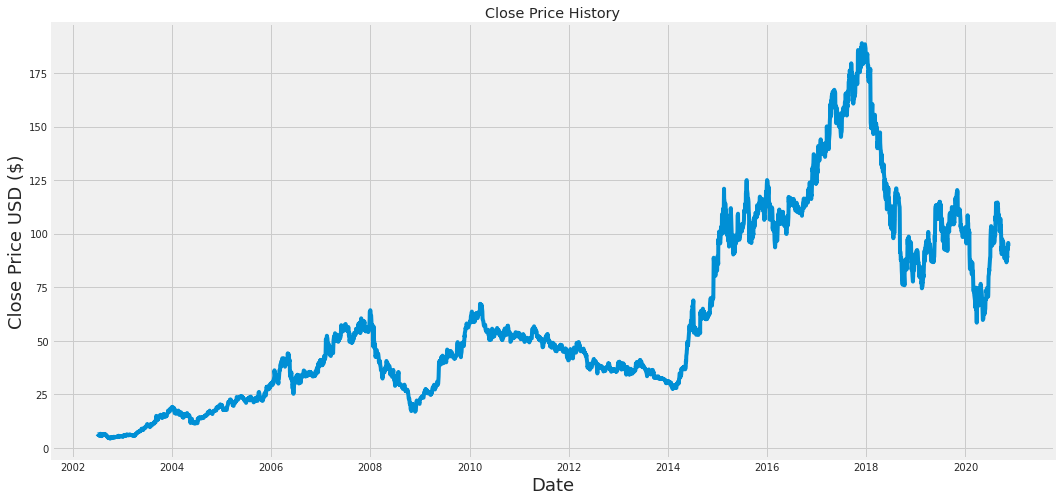

In [2]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

**3. Splitting the data in training, validation and test**

In [3]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))
validation_data_len = int(np.ceil( len(dataset) * .1 ))
test_data_len = int(np.ceil( len(dataset) * .1 ))
print(training_data_len)
print(validation_data_len)
print(test_data_len)

3628
454
454


**4. Data Normalization**

In [4]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01150254],
       [0.01099392],
       [0.0102309 ],
       ...,
       [0.4947902 ],
       [0.48693862],
       [0.48585566]])

**5. Fetching train data**

In [5]:
train_data = scaled_data[0:int(training_data_len), :]
valid_data = scaled_data[int(training_data_len)- 60: int(training_data_len) + int(validation_data_len), :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.01150254, 0.01099392, 0.0102309 , 0.01006678, 0.01027189,
       0.00993552, 0.00980426, 0.0091561 , 0.00831105, 0.00863102,
       0.00829464, 0.00881155, 0.0068917 , 0.00790905, 0.0106739 ,
       0.00977145, 0.01186355, 0.01008318, 0.01183897, 0.00928736,
       0.00820438, 0.00677685, 0.007868  , 0.007064  , 0.00608764,
       0.00683425, 0.00827006, 0.0106903 , 0.0096566 , 0.01114976,
       0.01164202, 0.01124002, 0.01087084, 0.01035393, 0.01038674,
       0.0097304 , 0.01004219, 0.01093646, 0.01139592, 0.01167484,
       0.01133847, 0.01096928, 0.00977145, 0.00962379, 0.00852434,
       0.00770393, 0.00834387, 0.00840132, 0.00744137, 0.00512774,
       0.00604665, 0.00572669, 0.00575127, 0.00434015, 0.00397096,
       0.00365094, 0.00270745, 0.00108298, 0.0022644 , 0.00160806])]
[0.0012880940811089321]

[array([0.01150254, 0.01099392, 0.0102309 , 0.01006678, 0.01027189,
       0.00993552, 0.00980426, 0.0091561 , 0.00831105, 0.00863102,
       0.00829464, 0.00881155, 0.

(3568, 60, 1)

**6. Fetching the validation data**

In [6]:
#Split the data into x_valid and y_valid data sets
x_valid = []
y_valid = []

for i in range(60, len(valid_data)):
    x_valid.append(valid_data[i-60:i, 0])
    y_valid.append(valid_data[i, 0])
    if i<= 61:
        print(x_valid)
        print(y_valid)
        print()
        
# Convert the x_valid and y_valid to numpy arrays 
x_valid, y_valid = np.array(x_valid), np.array(y_valid)

#Reshape the data
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
x_valid.shape

[array([0.68787995, 0.68522126, 0.67168402, 0.67257207, 0.66292274,
       0.65834714, 0.64419261, 0.65204419, 0.64556798, 0.64982952,
       0.65347373, 0.64876821, 0.67714766, 0.68160411, 0.6813821 ,
       0.6714891 , 0.6924339 , 0.72073759, 0.72858917, 0.74003625,
       0.72908194, 0.72955299, 0.72221583, 0.7208621 , 0.71005941,
       0.70262476, 0.72202092, 0.72479876, 0.72209131, 0.73508703,
       0.75677371, 0.7346701 , 0.74865137, 0.73747505, 0.73680901,
       0.73317022, 0.74699978, 0.74720015, 0.74665871, 0.73659237,
       0.72807475, 0.71985499, 0.72706218, 0.72797733, 0.72861627,
       0.73262869, 0.7445631 , 0.72017442, 0.71766188, 0.71893984,
       0.72265985, 0.72538895, 0.71665477, 0.71242033, 0.72979673,
       0.72999164, 0.72549182, 0.74178525, 0.74828319, 0.75037327])]
[0.7492632886533009]

[array([0.68787995, 0.68522126, 0.67168402, 0.67257207, 0.66292274,
       0.65834714, 0.64419261, 0.65204419, 0.64556798, 0.64982952,
       0.65347373, 0.64876821, 0.677

(454, 60, 1)

**7. Model Building**

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

#Build the LSTM/GRU model
# LSTM Layer returns whole_seq_output, final_memory_state, and final_carry_state 
# GRU Layer whole_sequence_output, and final_state
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

model.add(LSTM(128, return_sequences= True))
model.add(LSTM(256, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model.fit(x_train, y_train, batch_size=1, validation_data=(x_valid, y_valid), epochs=10)

Epoch 1/10
3568/3568 [==============================] - 35s 10ms/step - loss: 0.0010 - val_loss: 8.0098e-04
Epoch 2/10
3568/3568 [==============================] - 33s 9ms/step - loss: 3.2053e-04 - val_loss: 0.0023
Epoch 3/10
3568/3568 [==============================] - 32s 9ms/step - loss: 2.9932e-04 - val_loss: 0.0083
Epoch 4/10
3568/3568 [==============================] - 33s 9ms/step - loss: 2.3634e-04 - val_loss: 9.8848e-04
Epoch 5/10
3568/3568 [==============================] - 32s 9ms/step - loss: 2.2033e-04 - val_loss: 0.0013
Epoch 6/10
3568/3568 [==============================] - 32s 9ms/step - loss: 1.5119e-04 - val_loss: 5.7943e-04
Epoch 7/10
3568/3568 [==============================] - 33s 9ms/step - loss: 1.6669e-04 - val_loss: 7.0099e-04
Epoch 8/10
3568/3568 [==============================] - 32s 9ms/step - loss: 1.4451e-04 - val_loss: 0.0058
Epoch 9/10
3568/3568 [==============================] - 32s 9ms/step - loss: 1.6203e-04 - val_loss: 7.0542e-04
Epoch 10/10
3568/356

**8. Plotting loss graph** 

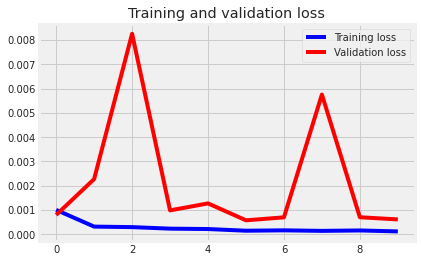

In [8]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss)) 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**9. Evaluate model performance**

In [9]:
test_data = scaled_data[training_data_len + validation_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len + validation_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.7851922272128844

**10. Plotting the actual and predicted values**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


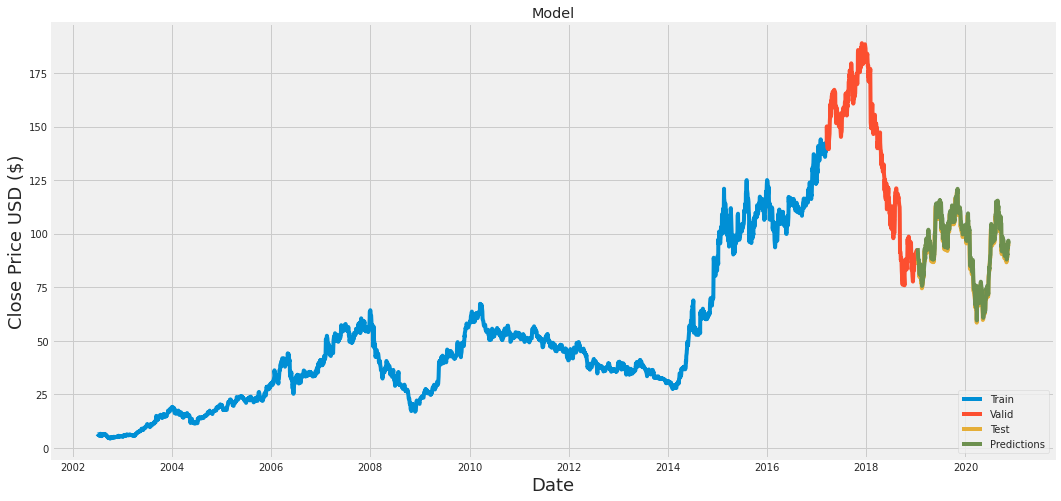

In [14]:
train = data[:training_data_len]
valid = data[training_data_len : training_data_len + validation_data_len]
test = data[training_data_len + validation_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(test[['Close','Predictions' ]])
plt.legend(['Train', 'Valid',  'Test', 'Predictions'], loc='lower right')
plt.show()


**References**
1. https://keras.io/api/layers/recurrent_layers/
2. https://keras.io/examples/
3. https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm
4. https://www.tensorflow.org/guide/keras/rnn